<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 10px; height: 55px">


# Project 4: West Nile Virus Prediction


# 1a_Exploratory Data Analysis
---

## Background

The West Nile virus (WNV) is the leading cause of mosquito-borne disease in the continental United States. The primary hosts of WNV are birds, so that the virus remains within a "bird–mosquito–bird" transmission cycle. Humans and horses both exhibit disease symptoms from the virus, and symptoms rarely occur in other animals. There are currently no vaccines to prevent or medications to treat WNV in humans.

The virus is primarily spread to humans through infected mosquitos, mostly species of Culex. Most people infected with WNV have few or no symptoms. About 1 in 5 people develop a fever and other symptoms, and about 1 out of 150 develop serious neurological illnesses that can result in death.

In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today.

Cases of WNV occur during mosquito season, which starts in the summer and continues through fall. Every week during this season, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

## Problem Statement

We are data scientists from the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Due to the recent epidemic of West Nile Virus in Chicago, we were tasked to create a model that can accurately predict when and where different species of mosquitos will test positive for West Nile virus using weather, location, testing, and spraying data collected by the surveillance and control program.

We also aim to evaluate the costs and benefits of spraying, this will help the City of Chicago and CDPH allocate resources more efficiently towards preventing transmission of this potentially deadly virus.


---
## Importing Libraries and Data


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [2]:
# Changing the default renderer for plotly
pio.renderers.default = "notebook_connected"

In [3]:
# Setting token for mapbox
MAPBOX_TOKEN = 'pk.eyJ1IjoiamVydmluc2VvdyIsImEiOiJjbDU4OWV5ZHkxaGxpM2pwb2prdTNybHR6In0.NXrZvzgu02F50pQKr1vNNQ'
px.set_mapbox_access_token(MAPBOX_TOKEN)

In [4]:
# Importing all csv files
train = pd.read_csv('../assets/train.csv')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')
test = pd.read_csv('../assets/test.csv')

## Train Dataset

In [5]:
# First look at the Train dataset
print(train.shape)
train.head()

(10506, 12)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


There are no null values in the dataset as a record is only made when a particular species of mosquitos is found at a certain trap at a certain time.

### Duplicate Data

In the data description, it was stated that the test results were organized in a way that when the number of mosquitos (`NumMosquitoes`) exceeded 50, they were split into another record (another row in the dataset), such that the number of mosquitos were capped at 50.

In [7]:
train[train.duplicated(keep=False)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2013-09-06,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,1
10259,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10391,2013-09-19,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,13,0


Looking at the data, we can see that there are some duplicated records with `NumMosquitoes` < 50. 2 notable pairs are rows 98 and 99, and rows 10391 and 10392. Rows with `NumMostquitos` == 50 are assumed not to be duplicated as explained in the data description. We will be removing them before further investigation.

In [8]:
# Extracting only the first of the duplicated rows, filtering out those with NumMosquitos == 50
train_dup = train[train.duplicated(keep='first')]
train_dup = train_dup[train_dup['NumMosquitos'] < 50]


In [9]:
# Dropping duplicates
train.drop(list(train_dup.index), axis = 0, inplace=True)

# Resetting index
train.reset_index(inplace=True, drop = True)

In [10]:
# Checking new shape of dataset
print(train.shape)

(10400, 12)


### EDA

#### WnvPresent

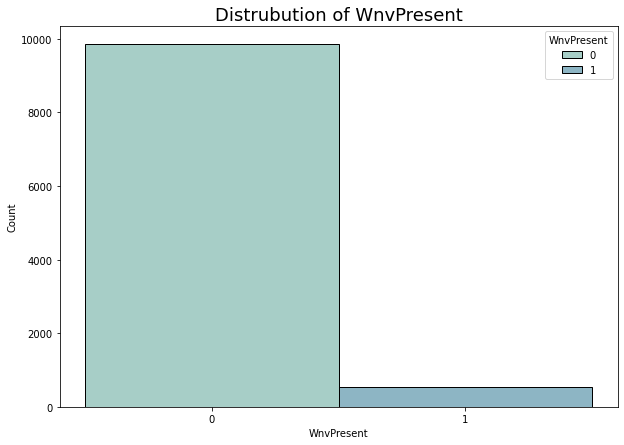

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(train, x='WnvPresent', discrete=True, hue='WnvPresent', palette = 'crest')
plt.xticks([0, 1])
plt.title('Distrubution of WnvPresent', fontsize=18);

In [12]:
# Calculating percentage of WnvPresent
train['WnvPresent'].value_counts(normalize=True)

0    0.947115
1    0.052885
Name: WnvPresent, dtype: float64

Out of all the observations, only around 5.3% were infected with WNV. It is crucial that we address this as an imbalanced classification problem so that we do not affect our model's accuracy.

#### Species

In [13]:
# Make Date into datetime
train['Date'] = pd.to_datetime(train['Date'])

# Add week and Year columns
train['Week'] = (train['Date'].dt.strftime('%W')).astype(int)
train['Year'] = (train['Date'].dt.strftime('%Y')).astype(int)

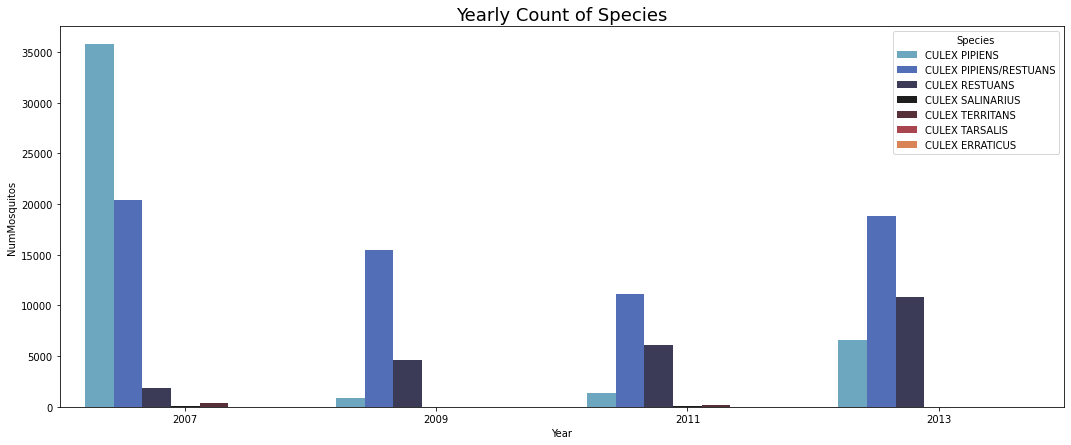

In [14]:
# Plotting yearly species count
year = train.groupby(['Year','Species'], as_index=False).sum().reindex()

plt.figure(figsize=(18,7))
sns.barplot(x='Year', y='NumMosquitos', hue='Species', data= year, palette='icefire')
plt.title('Yearly Count of Species', fontsize=18);

Majority of mosquitos are Culex Pipiens and Restuans. The presence of a Culex Pipiens/Restuans category suggests that is it difficult to differetiate both species. The number of identified Culex Pipiens mosquitos have dropped drastically over the years, whereas the number of identified Culex Restuans has been increasing steadily.

#### Infected Species

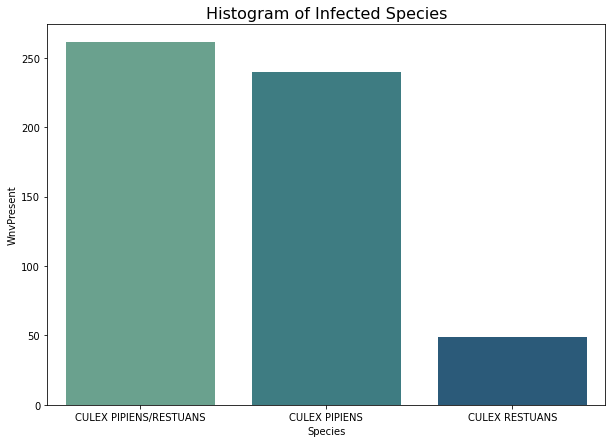

In [15]:
# Extracting data for infected mosquito species
infected = train[['Species', 'WnvPresent']].groupby('Species', as_index=False).sum()
infected.sort_values(by='WnvPresent', ascending=False, inplace=True)

# dropping species with 0 infected mosquitos
infected = infected[infected['WnvPresent'] > 0]

# Plotting Bar chart
plt.figure(figsize = (10,7))
sns.barplot(data=infected, x='Species', y='WnvPresent', palette='crest')
plt.title('Histogram of Infected Species', fontsize = 16);

Assuming that both species are equally unidentifiable, Culex Pipiens has been most responsible for the spread of WNV.

#### Traps

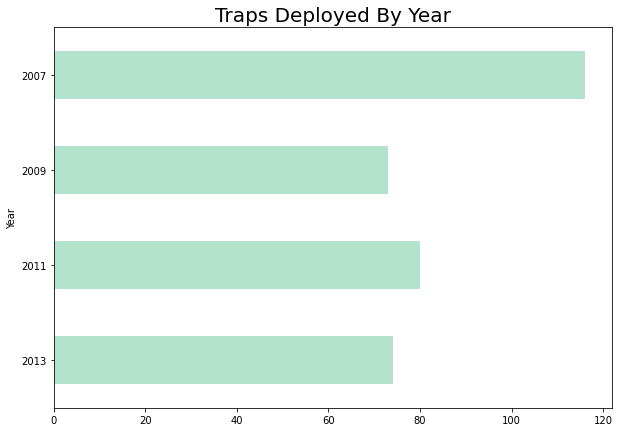

In [16]:
# Plot distribution of number of locations with traps deployed against year
fig, ax1 = plt.subplots(figsize=[10, 7])

train.groupby(['Year', 'Trap']).sum().value_counts('Year').sort_index(ascending=False).plot(kind="barh", ax=ax1,colormap='Pastel2')
ax1.set_title('Traps Deployed By Year', size=20);


Number of traps deployed has reduced by around 30% since 2007, but was stable throughout 2009 to 2013. A possible reason might be that redundant traps were removed to reduce cost.

#### Trap Locations

In [17]:
# Plotting all trap locations 
fig = px.scatter_mapbox(train, lat='Latitude', lon='Longitude',
                        size_max=15, zoom=9)

fig.update_layout(title='Trap Locations',
                  autosize=False,
                  width=700,
                  height=700,)

fig.show()

Locations of traps are quite evenly distributed, with several pairs/trios within close proximity of one another.

#### Map Visualization of NumMosquitos and WnvPresent

In [18]:
# Extracting relevant data
mosquito_count = train.groupby(['Address'], as_index=False)[['NumMosquitos']].sum()

areas = train.groupby(['Address'], as_index=False)[['Latitude', 'Longitude']].median()

wnv = train.groupby(['Address'], as_index=False)[['WnvPresent']].sum()

# sum() because it has either 0 or 1 values. adding ones will give us total cases in an area.
mosquito_areas_wnv = pd.concat([mosquito_count, areas, wnv], axis=1)
mosquito_areas_wnv.drop('Address', axis=1, inplace=True)


In [19]:
# Plotting map visualization of mosquito count
fig = px.scatter_mapbox(mosquito_areas_wnv, 
                        lat='Latitude', 
                        lon='Longitude', 
                        color='WnvPresent',
                        size='NumMosquitos',
                        hover_data=['NumMosquitos', 'WnvPresent'],
                        zoom=9, width=700, height=700)
fig.update_layout(title="NumMosquitos vs WnvPresent")
fig.show()


We can easily determine from this visualization the areas with the highest number of mosquitos, both infected and non-infected. It seems like the areas around the northern and southern fringe of the entire program are the worst, judging from the larger circles which represent a larger amount of mosquitos, and the brighter colors which represent a higher number of infected mosquitos.

---
## Test Dataset

In [20]:
# First look at the Test dataset
print(test.shape)
test.head()

(116293, 11)


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


The number of rows in the test dataset is significantly lesser than the number of rows in the train dataset. This might be because train dataset did not include observations where `NumMosquitoes` == 0.

In [22]:
# Finding difference between Train and Test dataset
list(set(train.columns)-set(test.columns)) + list(set(test.columns)-set(train.columns))

['Week', 'WnvPresent', 'NumMosquitos', 'Year', 'Id']

The Test Dataset drops the 'NumMosquitos' and 'WnvPresent' columns and has an extra 'Id' column. 

---

## Spray Dataset

In [23]:
# First look at the spray dataset
print(spray.shape)
spray.head()

(14835, 4)


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [24]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


There are 584 rows of spray data with missing values for `Time`. We will not be dropping these rows as the `Date` value is seemingly sufficient to make those rows usable.

### Duplicate Data

Like the train dataset, we found that there were duplicates in the spray dataset. We will be removing them before further investigation.

In [25]:
# Identifying duplicated data
spray_dup = spray[spray.duplicated(keep=False)]
spray_dup

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
...,...,...,...,...
1025,2011-09-07,7:44:32 PM,41.986460,-87.794225
1026,2011-09-07,7:44:32 PM,41.986460,-87.794225
1027,2011-09-07,7:44:32 PM,41.986460,-87.794225
1028,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [26]:
# Dropping duplicates
spray.drop(list(spray_dup.index), axis = 0, inplace=True)

# Resetting index
spray.reset_index(inplace=True, drop = True)

### Spray Dates

In [27]:
# Identifying different spray dates
spray['Date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

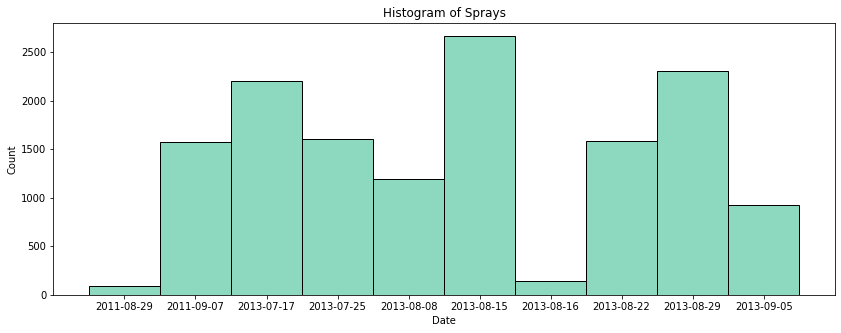

In [28]:
# Plotting histogram of spray dates
plt.figure(figsize=(14,5))
sns.histplot(data=spray, x='Date', color="mediumaquamarine").set(title='Histogram of Sprays');

Spraying only took place in two months of 2011, but took place more frequently throughout July to September in 2013. It is worth noting that most of the spraying of 2013 took place in August.

### Spray Areas

In [29]:
# Plotting spray areas on their respective dates
fig = px.scatter_mapbox(spray, lat='Latitude', lon='Longitude',
                        animation_frame="Date",
                        size_max=30, 
                        zoom=8)
fig.update_layout(title="Spray Areas on Individual Dates", width=600, height=800)
fig.show()

The sprays on 2011-08-29 are further North than what we have seen in the train dataset. There are no traps in close proximity.

In [30]:
# Combining above plot with 'NumMosquitos vs WnvPresent' plot
fig = px.scatter_mapbox(spray, lat='Latitude', lon='Longitude',
                        size_max=30, zoom=9, color_discrete_sequence=["paleturquoise"],  opacity=0.5)

fig2 = px.scatter_mapbox(mosquito_areas_wnv, lat='Latitude', lon='Longitude', color='WnvPresent',
                         size='NumMosquitos', color_continuous_scale=px.colors.cyclical.IceFire,
                         hover_data=['NumMosquitos', 'WnvPresent'],
                         zoom=9)

fig.add_trace(fig2.data[0])

fig.update_layout(title='Spray Areas vs Mosquito Count vs WnvPresent',
                  width=700,
                  height=700)


From the combination of the two previous plots, we can see that spray areas only overlapped with some of the traps placed.

After comparing the datasets we've investigated, we can conclude that spray data cannot be used to predict the presense of WNV due to its absence in the test dataset. Hence, we will only revisit the dataset again during our Cost-Benefit Analysis (CBA). Further EDA will be conducted then.

---
## Weather Dataset

In [31]:
# First look at the weather dataset
print(weather.shape)
weather.head()

(2944, 22)


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [33]:
# Creating functions to convert data types
def float_convertor(string_value):
    try:
        return float(string_value)
    except:
        pass

def int_convertor(string_value):
    try:
        return int(string_value)
    except:
        try:
            string_value = string_value.replace(' ', '')
            return int(string_value)
        except:
            pass

In [34]:
# Drop rows with missing values indeicated as "M" or "-"
weather = weather.drop(weather[weather['StnPressure']=='M'].index, axis = 0)
weather = weather.drop(weather[weather['SeaLevel']=='M'].index, axis = 0)
weather = weather.drop(weather[weather['WetBulb']=='M'].index, axis = 0)
weather = weather.drop(weather[weather['Sunrise']=='-'].index, axis = 0)

# Convert string to integer or float
weather['Tavg'] = weather['Tavg'].map(int_convertor)
weather["StnPressure"]=weather['StnPressure'].map(float_convertor)
weather['SeaLevel']=weather['SeaLevel'].map(float_convertor)
weather['WetBulb'] = weather['WetBulb'].map(int_convertor)
weather['AvgSpeed'] = weather['AvgSpeed'].map(float_convertor)
weather['Heat'] = weather['Heat'].map(int_convertor)
weather['Cool'] = weather['Cool'].map(int_convertor)
weather['Sunrise']=weather['Sunset'].map(int_convertor)
weather['Sunset']=weather['Sunset'].map(int_convertor)

### Correlation Matrix

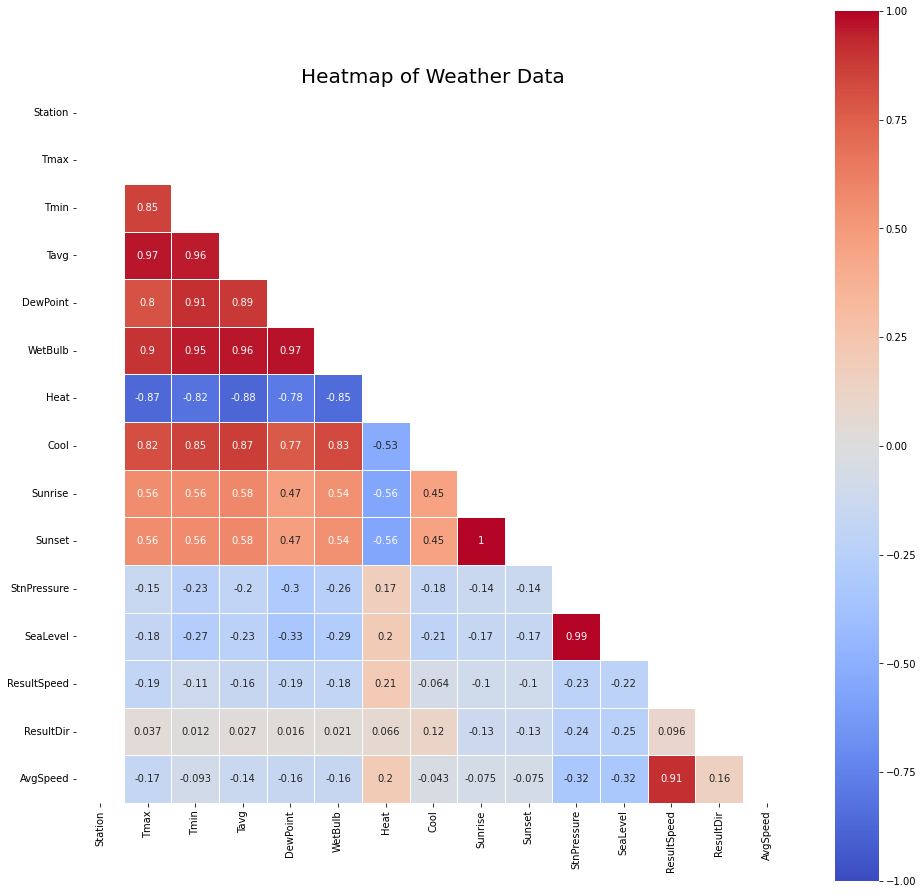

In [35]:
# Plotting heatmap of weather data
plt.figure(figsize=(16, 16))
mask = np.zeros_like(weather.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(weather.corr(), cmap='coolwarm', mask=mask,
                 square=True, vmin=-1, vmax=1, linewidths=.5, annot=True)
plt.title('Heatmap of Weather Data', fontsize=20);

- Temperature related data like `Tmax` and `Tmin` have really high correlation with one another, and this is further extended to `Heat` and `Cool`. We can also see that `Sunrise` and `Sunset` timings are moderately correlated to temperature related features.

- `StnPressure` and `SeaLevel` (sea level pressure) are pressure related and are almost perfectly correlated.

- There is also a high correlation between `ResultSpeed` and `AvgSpeed`, which are both wind related features.

- All these observations are to be expected as it is normal for features from the same category to be closely related.

We will be conducting additional EDA of the `weather` dataset in our CBA.

---

### Exporting Data

In [36]:
# Exporting datasets to csv
test.to_csv('../assets/data_js/test_2.csv',index=False)
weather.to_csv('../assets/data_js/weather_2.csv',index=False)
spray.to_csv('../assets/data_js/spray_2.csv',index=False)
train.to_csv('../assets/data_js/train_2.csv',index=False)

---